In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scienceplots
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import os

# Apply the default theme
#sns.set_theme()
#sns.set_style('white')
#sns.set_context("paper", font_scale = 2)
#plt.style.use(['science','no-latex'])
print('Pandas v', pd.__version__)

Pandas v 2.0.0


# Configurations

In [2]:
# Configurations 
#latex_dir = Path(r"C:\Users\3057550\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
#latex_dir = Path(r"C:\Users\kasim\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
latex_dir = Path(r'C:\Users\kasim\Documents\GitHub\hybrid_nlp_journal')
SAVE_OUTPUTS = False

In [3]:
# Notes about result files:

main_folder = Path('../')


results_file = main_folder / 'results' / 'results_230422_204455.csv' # temp - all
print(results_file.is_file())

True


In [4]:
methods={}

methods['classic_ml'] = ['naive_bayes', 'xgboost', 'svm']

method_categories = [method_cat for method_cat in methods]

# Load and Setup Data

In [5]:
# Rename Columns and Index properly (for latex tables and figures)
def rename_table_labels(df_bad_labeled):
    column_mapper = {
        "accuracy": "Accuracy", 
        "precision": "Precision",
        "recall":"Recall",
        "f1_score":"F1",
        "tn":"TN",
        "tp":"TP",
        "fn":"FN",
        "fp":"FP",
        "train_size":"Train Size",
        "test_size":"Test Size",
        "dataset":"Dataset",
        "train_time":"Training Time (ms)",
        "pred_time":"Inference Time (ms)",
        "method":"Method"
        }
    method_mapper = {
        "proposed": "Proposed",
        "bow_nb": "BoW NB",
        "bow_xgboost": "BoW XGBoost", 
        'bow_svm':'BoW SVM',
        'boc_nb': 'BoC NB', 
        'boc_xgboost':'BoC XGBoost', 
        'boc_svm': 'BoC SVM',
        'tfidf_nb': 'TF-IDF NB', 
        'tfidf_xgboost': 'TF-IDF XGBoost', 
        'tfidf_svm': 'TF-IDF SVM', 
        'tfidfng_nb': 'TF-IDF ngram NB',
        'tfidfng_xgboost': 'TF-IDF ngram XGBoost', 
        'tfidfng_svm': 'TF-IDF ngram SVM',
        'xgboost tf-idf': 'TF-IDF XGBoost', 
        'naive_bayes tf-idf': 'TF-IDF NB', 
        'svm tf-idf': 'TF-IDF SVM', 
        'xgboost tf-idf_ngram': 'TF-IDF ngram XGBoost', 
        'naive_bayes tf-idf_ngram': 'TF-IDF ngram NB', 
        'svm tf-idf_ngram':'TF-IDF ngram SVM', 
        'xgboost bag_of_characters':'BoC XGBoost', 
        'naive_bayes bag_of_characters': 'BoC NB', 
        'svm bag_of_characters': 'BoC SVM'
    }
    
    #df_new_labeled = df_bad_labeled.rename(columns=column_mapper, index=index_mapper)
    df_new_labeled = df_bad_labeled.rename(columns=column_mapper)
    #df_new_labeled.index.rename("Method",inplace=True)
    df_new_labeled=df_new_labeled.replace({"Method": method_mapper})
    return df_new_labeled

## Function definitions

In [6]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_bar(df_small, ax, metric='f1', width=0.9, offset=0):
    
    
    col_names = df_small.columns
    #row_names = df_small.Method
    
    colors = df_small.loc[:,'color'].values
    colors = [list(colors[i][0]) for i in range(len(colors))]

    bar_vals = df_small.loc[:][metric].values.tolist()
    bar_tics = df_small.loc[:]['Method'].values.tolist()
    bar_width = width

    bar_container = ax.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax.bar_label(bar_container, fmt='%0.4f', padding=0.8, rotation=90)
    
    #ax.tick_params(axis='x', rotation=70, ha="right")
    plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.tick_params(axis='y', which='both', right=False)
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    #ax.set(ylim=(0.8, 1))




In [7]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_twin_bar(df_small, ax, metric=['F1','Inference Time (ms)']):
    width = 0.3
    offset = 0.3
    my_plot_bar(df_small, ax, metric[0],width=width,offset=0)

    ax2 = ax.twinx()
    ax2.tick_params(axis='x', which='both', bottom=False, top=False)
    ax2.spines.top.set_visible(False)
    # col_names = df_small.columns
    # row_names = df_small.index
    
    colors = df_small.loc[:,'color'].values
    colors = [list(colors[i][0]) for i in range(len(colors))]
    new_colors = np.asarray(colors)/[3.2, 3.2, 3.2, 1]
    new_colors = new_colors.sum(axis=1)-1
    new_colors = np.expand_dims(new_colors, axis=0)
    new_colors = np.tile(new_colors.transpose(),(1,4))
    new_colors[:,3] =1
    colors = new_colors.tolist()
    

    bar_vals = df_small.loc[:][metric[1]].values.tolist()
    bar_tics = df_small.loc[:]['Method'].values.tolist()
    bar_width = width

    bar_container = ax2.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax2.bar_label(bar_container, fmt='%0.4fms', padding=0.8, rotation=90)
    
    # #ax.tick_params(axis='x', rotation=70, ha="right")
    # plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    # plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    # ax.tick_params(axis='x', which='both', bottom=False, top=False)
    # ax.tick_params(axis='y', which='both', right=False)
    # # Hide the right and top spines
    # ax.spines.right.set_visible(False)
    # ax.spines.top.set_visible(False)

    return ax, ax2

    #ax.set(ylim=(0.8, 1))




## Read and preprocess dataset

In [8]:
#%%script echo skip
df_all = pd.read_csv(results_file)
df_all.drop(columns=['method'],inplace=True)


In [9]:
df = df_all.copy()
df.reset_index(drop=True, inplace=True)

### Preprocess datasets

In [13]:
for index, row in df.iterrows():
  df.loc[index,'category'] = 'classic_ml'
  #for method_cat in methods.keys():
  #  if df.loc[index, 'model'] in methods[method_cat]:
  #   df.loc[index,'category'] = method_cat

In [14]:
for index, row in df.iterrows():
  print(df.loc[index, 'model'])
  if df.loc[index,'category'] == 'classic_ml':
    df.loc[index,'Method'] = df.loc[index,'model'] + ' ' + df.loc[index, 'feature_method']
  else:
    df.loc[index,'Method'] = df.loc[index,'model']

#df.set_index('index_col', inplace=True)

XGBoost
MultinomialNB
SVM_RBF
MLPClassifier
KNeighborsClassifier
NearestCentroid
RadiusNeighborsClassifier
SVC-GC
NuSVC
LinearSVC
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
BaggingClassifier
ExtraTreesClassifier
RidgeClassifier
SGDClassifier
Perceptron
LogisticRegression
PassiveAggressiveClassifier
OneVsRestClassifier
OneVsOneClassifier
XGBoost
MultinomialNB
SVM_RBF
MLPClassifier
KNeighborsClassifier
NearestCentroid
RadiusNeighborsClassifier
SVC-GC
NuSVC
LinearSVC
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
BaggingClassifier
ExtraTreesClassifier
RidgeClassifier
SGDClassifier
Perceptron
LogisticRegression
PassiveAggressiveClassifier
OneVsRestClassifier
OneVsOneClassifier


In [12]:
#df['index_col'] = df['model'].str.cat(df['feature_method'], sep=' ')
#df.set_index('index_col', inplace=True)

In [15]:
df

accuracy  precision    recall  f1_score    tp    tn    fp    fn   
0   0.997386   0.999557  0.993401  0.996470  2258  3848     1    15  \
1   0.920778   0.832837  0.984162  0.902198  2237  3400   449    36   
2   0.997060   0.999557  0.992521  0.996026  2256  3848     1    17   
3   0.989873   0.998197  0.974483  0.986198  2215  3845     4    58   
4   0.980235   0.983813  0.962604  0.973093  2188  3813    36    85   
5   0.959654   0.990319  0.900132  0.943074  2046  3829    20   227   
6   0.822770   0.686324  0.962604  0.801318  2188  2849  1000    85   
7   0.995590   0.999555  0.988561  0.994028  2247  3848     1    26   
8   0.937112   1.000000  0.830620  0.907474  1888  3849     0   385   
9   0.997550   0.999558  0.993841  0.996691  2259  3848     1    14   
10  0.987096   0.994144  0.970963  0.982417  2207  3836    13    66   
11  0.628716   0.000000  0.000000  0.000000     0  3849     0  2273   
12  0.995590   0.997343  0.990761  0.994041  2252  3843     6    21   
13  0.995590   0.999111  0.989001  0.994031  2248  3847     2    25   
14  0.997713   1.000000  0.993841  0.996911  2259  3849     0    14   
15  0.996896   0.999557  0.992081  0.995805  2255  3848     1    18   
16  0.996406   0.999556  0.990761  0.995139  2252  3848     1    21   
17  0.997223   0.996479  0.996040  0.996260  2264  3841     8     9   
18  0.994610   0.999109  0.986362  0.992694  2242  3847     2    31   
19  0.998530   1.000000  0.996040  0.998016  2264  3849     0     9   
20  0.997386   0.999557  0.993401  0.996470  2258  3848     1    15   
21  0.997386   0.999557  0.993401  0.996470  2258  3848     1    15   
22  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   
23  0.982359   0.975824  0.976683  0.976253  2220  3794    55    53   
24  0.810683   0.669095  0.969644  0.791809  2204  2759  1090    69   
25  0.973048   0.997639  0.929608  0.962423  2113  3844     5   160   
26  0.553087   0.453691  0.997800  0.623762  2268  1118  2731     5   
27  0.934172   0.996812  0.825341  0.903008  1876  3843     6   397   
28  0.650441   0.515158  0.994281  0.678679  2260  1722  2127    13   
29  0.803496   0.664717  0.949846  0.782105  2159  2760  1089   114   
30  0.911467   0.999423  0.761989  0.864703  1732  3848     1   541   
31  0.984809   0.987478  0.971403  0.979375  2208  3821    28    65   
32  0.981542   0.995868  0.954245  0.974612  2169  3840     9   104   
33  0.628716   0.000000  0.000000  0.000000     0  3849     0  2273   
34  0.992813   0.996879  0.983722  0.990257  2236  3842     7    37   
35  0.787488   0.637755  0.989881  0.775728  2250  2571  1278    23   
36  0.796962   0.646807  0.998240  0.784985  2269  2610  1239     4   
37  0.977622   0.992620  0.946766  0.969151  2152  3833    16   121   
38  0.984972   0.995457  0.963924  0.979437  2191  3839    10    82   
39  0.995100   0.995581  0.991201  0.993386  2253  3839    10    20   
40  0.982522   0.996334  0.956445  0.975982  2174  3841     8    99   
41  0.987586   0.986277  0.980202  0.983230  2228  3818    31    45   
42  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   
43  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   

   feature_method                        model  ...  train_size  test_size   
0    tf-idf_ngram                      XGBoost  ...       24487       6122  \
1    tf-idf_ngram                MultinomialNB  ...       24487       6122   
2    tf-idf_ngram                      SVM_RBF  ...       24487       6122   
3    tf-idf_ngram                MLPClassifier  ...       24487       6122   
4    tf-idf_ngram         KNeighborsClassifier  ...       24487       6122   
5    tf-idf_ngram              NearestCentroid  ...       24487       6122   
6    tf-idf_ngram    RadiusNeighborsClassifier  ...       24487       6122   
7    tf-idf_ngram                       SVC-GC  ...       24487       6122   
8    tf-idf_ngram                        NuSVC  ...       24487       6122   
9    tf-idf_ngram           

In [16]:
# set the colormap for each category (classical ml, ensemble, transformer)
metric='f1_score'
method_categories = [i for i in methods.keys()]
method_cat_cm_func = [plt.cm.BuPu, plt.cm.YlGn, plt.cm.OrRd]
#df.loc[:, 'color'] = [0.0]
df['color'] = None
for k, cat in enumerate(method_categories):
    cat_cm_func = method_cat_cm_func[k]
    df_small = df[df['category']==cat] # OR df.loc[methods[cat]]
    
    df_small = df_small.sort_values(metric,ascending=False)
    col_names = df_small.columns
    #row_names = df_small.index

    colors = cat_cm_func(np.linspace(0.1, 0.6, len(df_small)))
    colors = colors[::-1]
    df_small.loc[:, 'color'] = [ 0 for i in range(len(df_small))]
    print(cat)
    #for i in range(len(df_small)):
        #df_small.iloc[i,'color'] = [[np.asarray(colors[i],dtype=float)]]
        #print([[np.asarray(colors[i],dtype=float)]])
        #df_small.loc[i].color
        #print(i, df_small.iloc[i,'color'])
    i = 0
    for index, row in df_small.iterrows():
    #for idx in range(len(df_small)):
      #df_small.loc[index, 'color']=[[np.asarray(colors[i],dtype=float)]]
      #df_small.loc[index, 'color']=[colors[i]]
      #df_small.loc[:, 'color'].iloc[idx] = [[np.asarray(colors[i],dtype=float)]]
      #df_small.loc[index, 'color'] = np.asarray(colors[i], dtype=float)
      df_small.at[index,'color'] = [colors[i]]
      i += 1
        
    df.update(df_small)

classic_ml


In [17]:
df

accuracy  precision    recall  f1_score    tp    tn    fp    fn   
0   0.997386   0.999557  0.993401  0.996470  2258  3848     1    15  \
1   0.920778   0.832837  0.984162  0.902198  2237  3400   449    36   
2   0.997060   0.999557  0.992521  0.996026  2256  3848     1    17   
3   0.989873   0.998197  0.974483  0.986198  2215  3845     4    58   
4   0.980235   0.983813  0.962604  0.973093  2188  3813    36    85   
5   0.959654   0.990319  0.900132  0.943074  2046  3829    20   227   
6   0.822770   0.686324  0.962604  0.801318  2188  2849  1000    85   
7   0.995590   0.999555  0.988561  0.994028  2247  3848     1    26   
8   0.937112   1.000000  0.830620  0.907474  1888  3849     0   385   
9   0.997550   0.999558  0.993841  0.996691  2259  3848     1    14   
10  0.987096   0.994144  0.970963  0.982417  2207  3836    13    66   
11  0.628716   0.000000  0.000000  0.000000     0  3849     0  2273   
12  0.995590   0.997343  0.990761  0.994041  2252  3843     6    21   
13  0.995590   0.999111  0.989001  0.994031  2248  3847     2    25   
14  0.997713   1.000000  0.993841  0.996911  2259  3849     0    14   
15  0.996896   0.999557  0.992081  0.995805  2255  3848     1    18   
16  0.996406   0.999556  0.990761  0.995139  2252  3848     1    21   
17  0.997223   0.996479  0.996040  0.996260  2264  3841     8     9   
18  0.994610   0.999109  0.986362  0.992694  2242  3847     2    31   
19  0.998530   1.000000  0.996040  0.998016  2264  3849     0     9   
20  0.997386   0.999557  0.993401  0.996470  2258  3848     1    15   
21  0.997386   0.999557  0.993401  0.996470  2258  3848     1    15   
22  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   
23  0.982359   0.975824  0.976683  0.976253  2220  3794    55    53   
24  0.810683   0.669095  0.969644  0.791809  2204  2759  1090    69   
25  0.973048   0.997639  0.929608  0.962423  2113  3844     5   160   
26  0.553087   0.453691  0.997800  0.623762  2268  1118  2731     5   
27  0.934172   0.996812  0.825341  0.903008  1876  3843     6   397   
28  0.650441   0.515158  0.994281  0.678679  2260  1722  2127    13   
29  0.803496   0.664717  0.949846  0.782105  2159  2760  1089   114   
30  0.911467   0.999423  0.761989  0.864703  1732  3848     1   541   
31  0.984809   0.987478  0.971403  0.979375  2208  3821    28    65   
32  0.981542   0.995868  0.954245  0.974612  2169  3840     9   104   
33  0.628716   0.000000  0.000000  0.000000     0  3849     0  2273   
34  0.992813   0.996879  0.983722  0.990257  2236  3842     7    37   
35  0.787488   0.637755  0.989881  0.775728  2250  2571  1278    23   
36  0.796962   0.646807  0.998240  0.784985  2269  2610  1239     4   
37  0.977622   0.992620  0.946766  0.969151  2152  3833    16   121   
38  0.984972   0.995457  0.963924  0.979437  2191  3839    10    82   
39  0.995100   0.995581  0.991201  0.993386  2253  3839    10    20   
40  0.982522   0.996334  0.956445  0.975982  2174  3841     8    99   
41  0.987586   0.986277  0.980202  0.983230  2228  3818    31    45   
42  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   
43  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   

   feature_method                        model  ...  test_size   
0    tf-idf_ngram                      XGBoost  ...       6122  \
1    tf-idf_ngram                MultinomialNB  ...       6122   
2    tf-idf_ngram                      SVM_RBF  ...       6122   
3    tf-idf_ngram                MLPClassifier  ...       6122   
4    tf-idf_ngram         KNeighborsClassifier  ...       6122   
5    tf-idf_ngram              NearestCentroid  ...       6122   
6    tf-idf_ngram    RadiusNeighborsClassifier  ...       6122   
7    tf-idf_ngram                       SVC-GC  ...       6122   
8    tf-idf_ngram                        NuSVC  ...       6122   
9    tf-idf_ngram                    LinearSVC  ...       6122   
10   tf-idf_ngram       DecisionTreeClassifier  ...       6122   
11   tf-idf_ngra

# Latex

## Latex Figures and Tables

In [18]:
# Figure configs
plt.rcParams.update({'figure.dpi': '300'})
#plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.family'] = "DejaVu Serif"

In [19]:
import pathlib
table_folder= latex_dir / "Tables"
figure_folder= latex_dir / "Figures"

### All Sorted (F1 and inference time)
Note: if you get warning:findfont: Font family 'Times New Roman' not found., install Times New Roman to ubuntu:  
```sudo apt install ttf-mscorefonts-installer```

['DejaVu Serif']


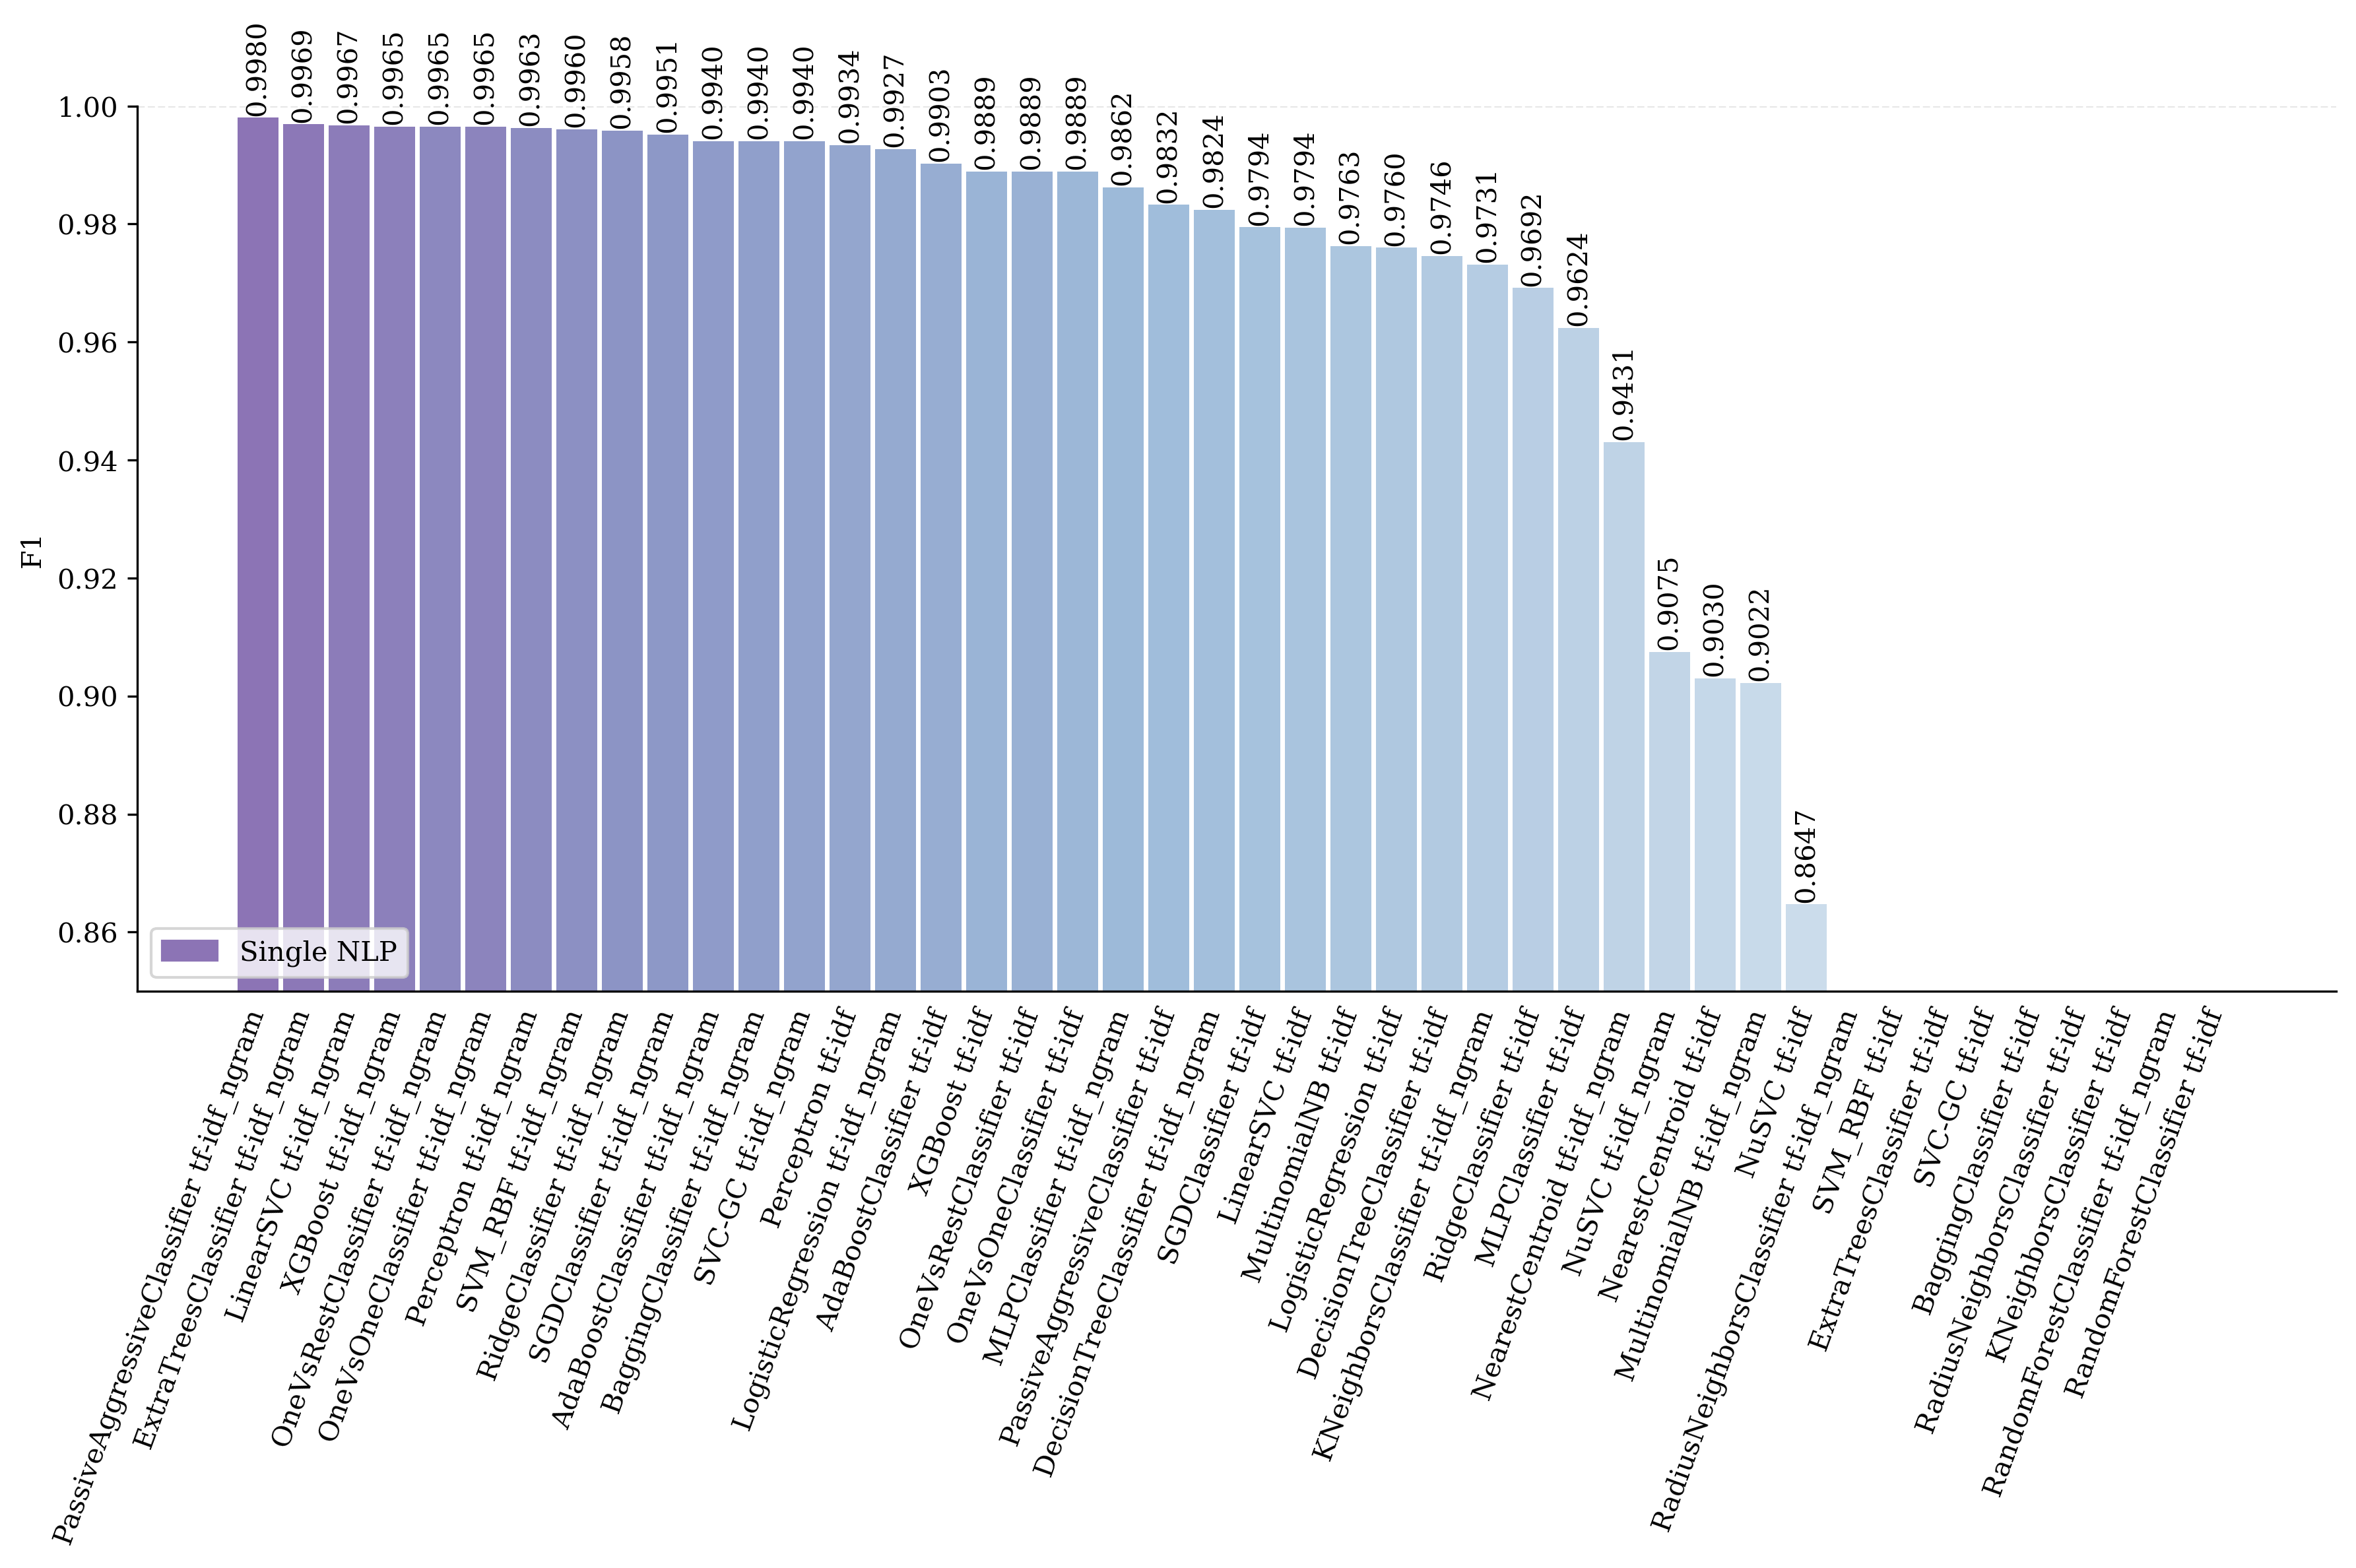

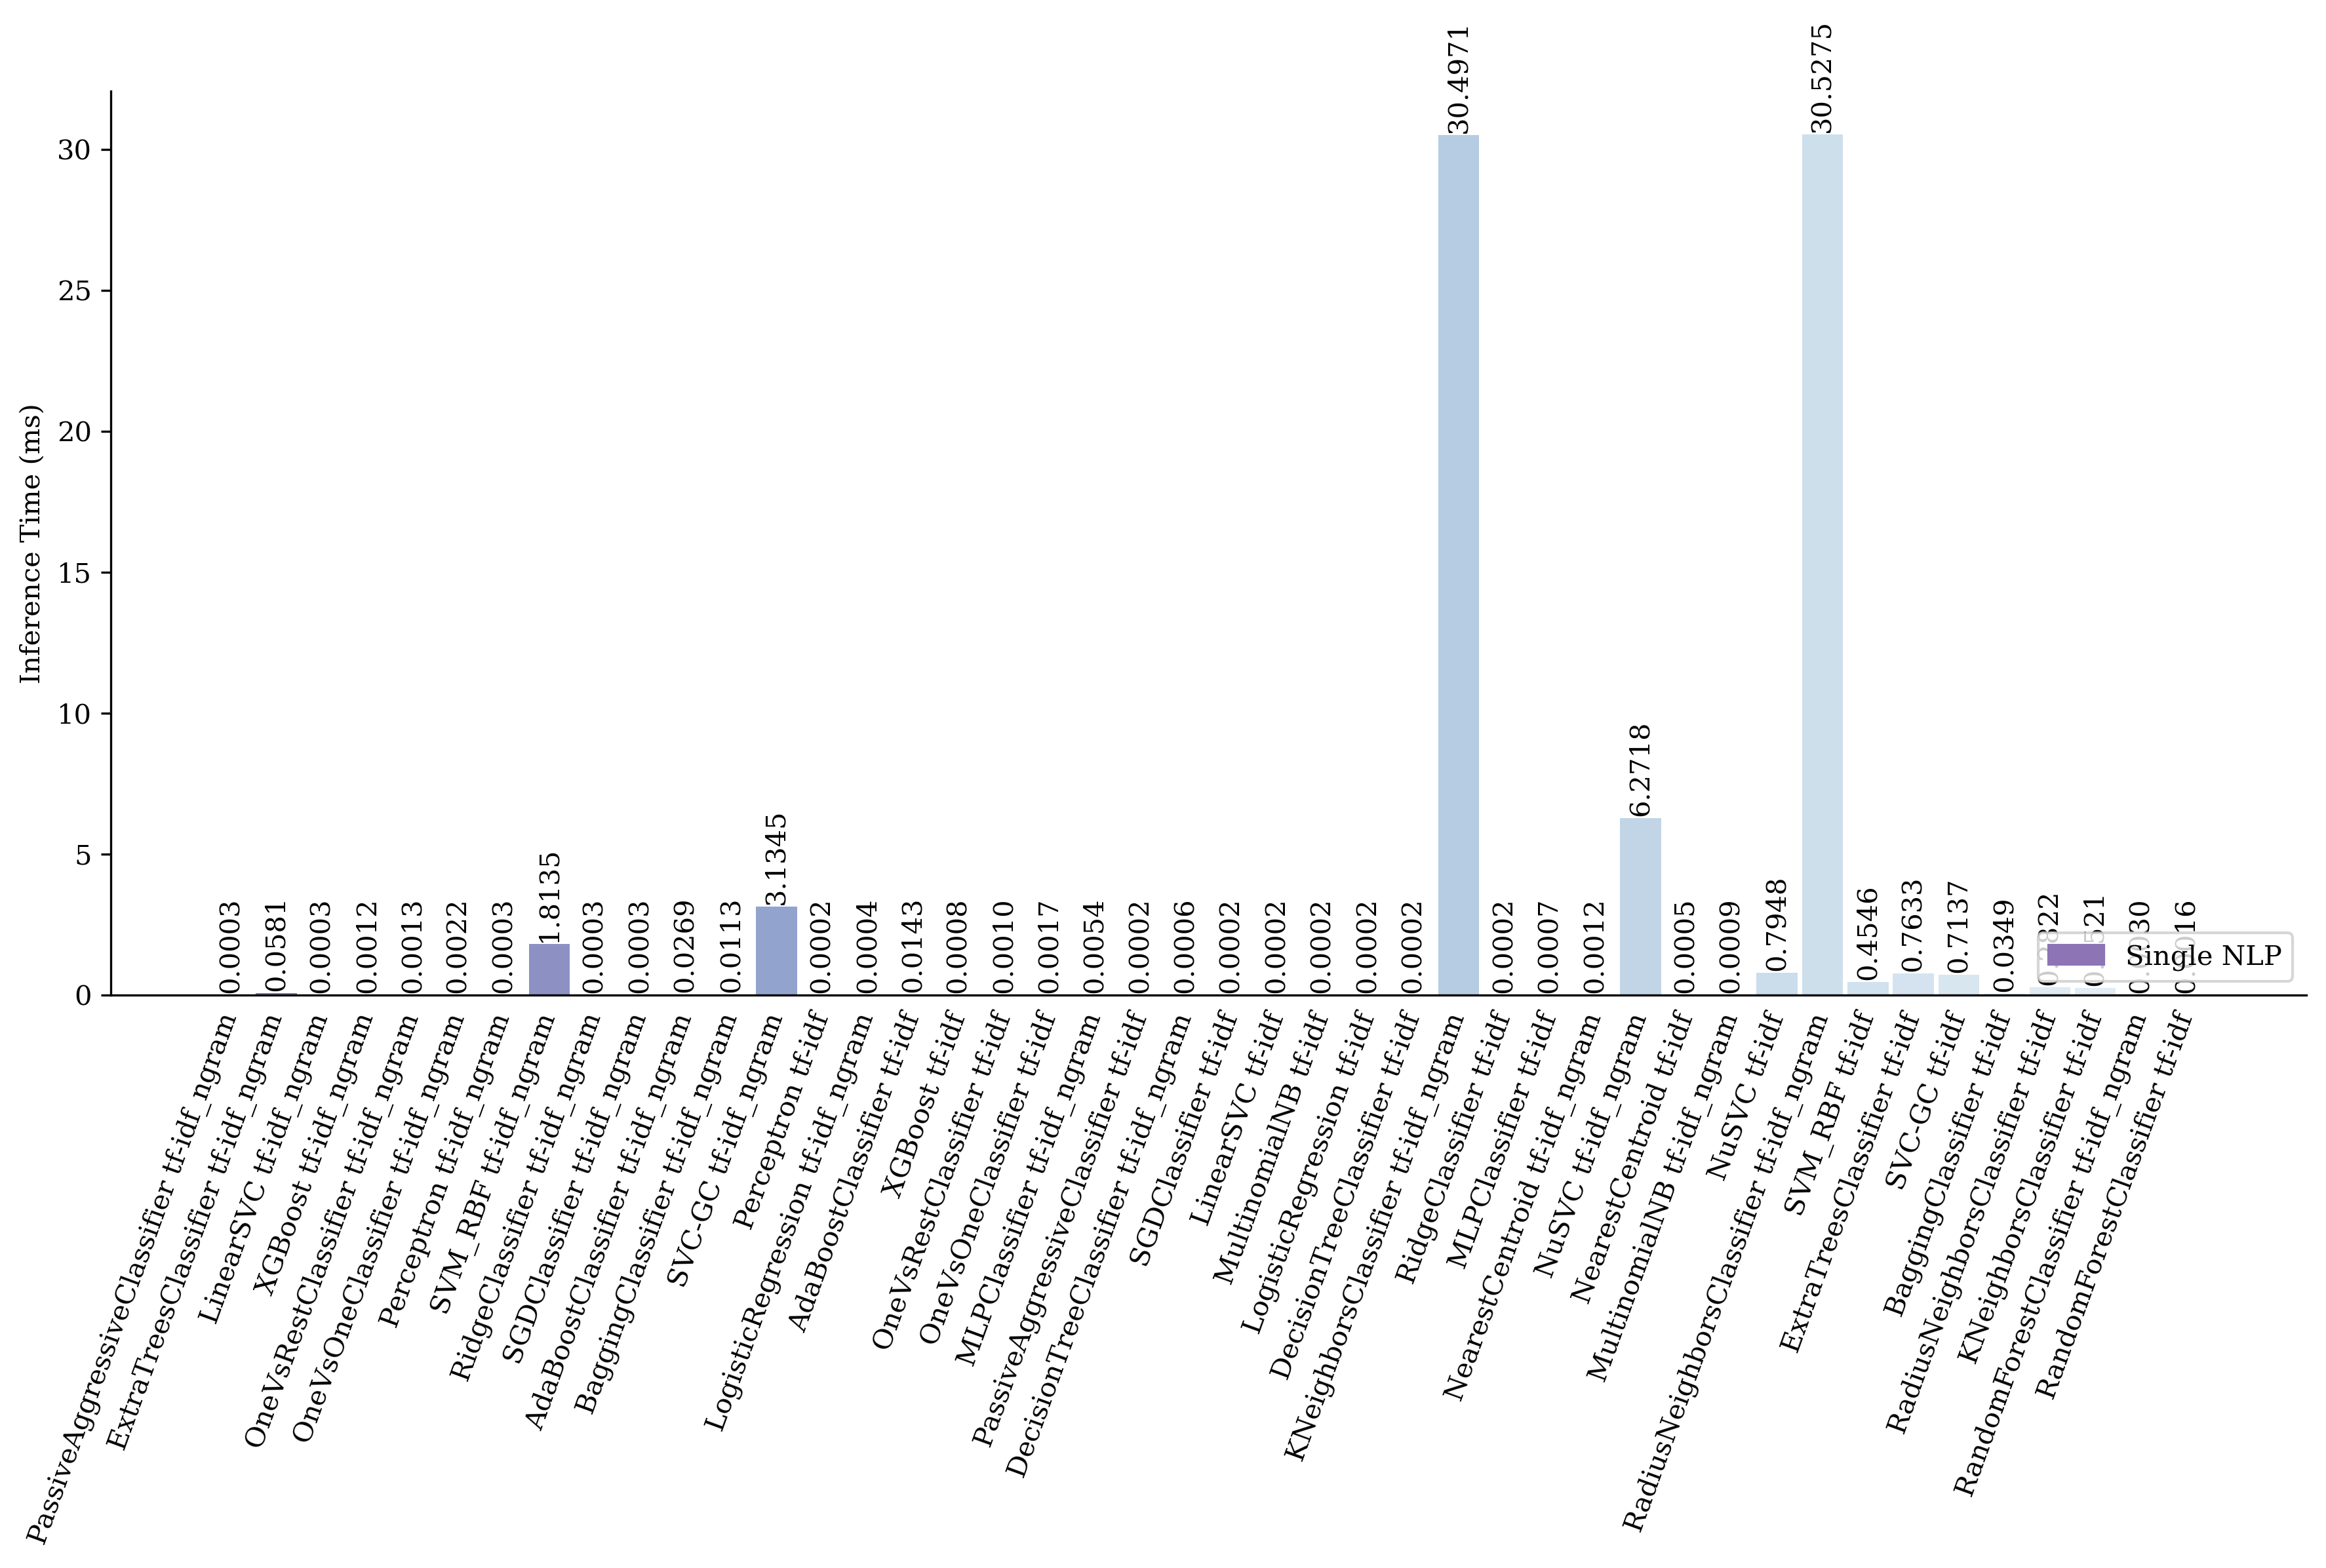

In [21]:
# method_category = 'transformer'
# metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
#        'testing time', 'color']
import matplotlib.patches as mpatches
df_small = df.sort_values(['category','f1_score'],ascending=[True, False])
df_small = rename_table_labels(df_small)
#df_small = df.loc[methods[method_category], metrics]
#df_small = df_small.sort_values(['category','f1'],ascending=[True, False])

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
current_figure_name = 'all_f1_sorted_f1.png'
fig, ax = plt.subplots(figsize=(12, 8))
my_plot_bar(df_small,ax,'F1')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.85, 1))
ax.set_ylabel('F1')
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)
###############################
current_figure_name = 'all_f1_sorted_inference_time.png'
fig, ax = plt.subplots(figsize=(12, 8))
my_plot_bar(df_small,ax,'Inference Time (ms)')
ax.set_ylabel('Inference Time (ms)')
ax.legend(handles=[legend_cat_1],  loc='lower right')
fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

print(plt.rcParams['font.family'])

In [22]:
def process_style_to_my_latex_format(df_latex):
  # returns style object
  
  s = df_latex.style
  s = s.format(precision=4, escape="latex")
  return s

### Single NLP (F1 vs Inference)

In [23]:
df_small

Accuracy  Precision    Recall        F1    TP    TN    FP    FN   
19  0.998530   1.000000  0.996040  0.998016  2264  3849     0     9  \
14  0.997713   1.000000  0.993841  0.996911  2259  3849     0    14   
9   0.997550   0.999558  0.993841  0.996691  2259  3848     1    14   
0   0.997386   0.999557  0.993401  0.996470  2258  3848     1    15   
20  0.997386   0.999557  0.993401  0.996470  2258  3848     1    15   
21  0.997386   0.999557  0.993401  0.996470  2258  3848     1    15   
17  0.997223   0.996479  0.996040  0.996260  2264  3841     8     9   
2   0.997060   0.999557  0.992521  0.996026  2256  3848     1    17   
15  0.996896   0.999557  0.992081  0.995805  2255  3848     1    18   
16  0.996406   0.999556  0.990761  0.995139  2252  3848     1    21   
12  0.995590   0.997343  0.990761  0.994041  2252  3843     6    21   
13  0.995590   0.999111  0.989001  0.994031  2248  3847     2    25   
7   0.995590   0.999555  0.988561  0.994028  2247  3848     1    26   
39  0.995100   0.995581  0.991201  0.993386  2253  3839    10    20   
18  0.994610   0.999109  0.986362  0.992694  2242  3847     2    31   
34  0.992813   0.996879  0.983722  0.990257  2236  3842     7    37   
22  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   
42  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   
43  0.991833   0.996871  0.981082  0.988914  2230  3842     7    43   
3   0.989873   0.998197  0.974483  0.986198  2215  3845     4    58   
41  0.987586   0.986277  0.980202  0.983230  2228  3818    31    45   
10  0.987096   0.994144  0.970963  0.982417  2207  3836    13    66   
38  0.984972   0.995457  0.963924  0.979437  2191  3839    10    82   
31  0.984809   0.987478  0.971403  0.979375  2208  3821    28    65   
23  0.982359   0.975824  0.976683  0.976253  2220  3794    55    53   
40  0.982522   0.996334  0.956445  0.975982  2174  3841     8    99   
32  0.981542   0.995868  0.954245  0.974612  2169  3840     9   104   
4   0.980235   0.983813  0.962604  0.973093  2188  3813    36    85   
37  0.977622   0.992620  0.946766  0.969151  2152  3833    16   121   
25  0.973048   0.997639  0.929608  0.962423  2113  3844     5   160   
5   0.959654   0.990319  0.900132  0.943074  2046  3829    20   227   
8   0.937112   1.000000  0.830620  0.907474  1888  3849     0   385   
27  0.934172   0.996812  0.825341  0.903008  1876  3843     6   397   
1   0.920778   0.832837  0.984162  0.902198  2237  3400   449    36   
30  0.911467   0.999423  0.761989  0.864703  1732  3848     1   541   
6   0.822770   0.686324  0.962604  0.801318  2188  2849  1000    85   
24  0.810683   0.669095  0.969644  0.791809  2204  2759  1090    69   
36  0.796962   0.646807  0.998240  0.784985  2269  2610  1239     4   
29  0.803496   0.664717  0.949846  0.782105  2159  2760  1089   114   
35  0.787488   0.637755  0.989881  0.775728  2250  2571  1278    23   
28  0.650441   0.515158  0.994281  0.678679  2260  1722  2127    13   
26  0.553087   0.453691  0.997800  0.623762  2268  1118  2731     5   
11  0.628716   0.000000  0.000000  0.000000     0  3849     0  2273   
33  0.628716   0.000000  0.000000  0.000000     0  3849     0  2273   

   feature_method                        model  ...  Test Size   
19   tf-idf_ngram  PassiveAggressiveClassifier  ...       6122  \
14   tf-idf_ngram         ExtraTreesClassifier  ...       6122   
9    tf-idf_ngram                    LinearSVC  ...       6122   
0    tf-idf_ngram                      XGBoost  ...       6122   
20   tf-idf_ngram          OneVsRestClassifier  ...       6122   
21   tf-idf_ngram           OneVsOneClassifier  ...       6122   
17   tf-idf_ngram                   Perceptron  ...       6122   
2    tf-idf_ngram                      SVM_RBF  ...       6122   
15   tf-idf_ngram              RidgeClassifier  ...       6122   
16   tf-idf_ngram                SGDClassifier  ...       6122   
12   tf-idf_ngram           AdaBoostClassifier  ...       6122   
13   tf-idf_ngra

In [24]:
# Table: Single NLP
table_name = "single"
caption="Accuracy and inference speed of single NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'classic_ml'
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'train_time',
       'pred_time', 'color', 'category', 'Method']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
df_small.set_index('Method', inplace=True)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

if SAVE_OUTPUTS:
    s.to_latex(buf=out_file_name,
       column_format="lrrrrrr", position="htbp", position_float="centering",
       hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)
#df.loc[:,"training time"] / df.loc[:,"train size"]
#(df.loc[:,["training time", "testing time"]]*1000).div(df.loc[:,["train size", "test size"]])

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of single NLP methods.}
\label{table:single}
\begin{tabular}{lrrrrrr}
\toprule
 & Accuracy & Precision & Recall & F1 & Training Time (ms) & Inference Time (ms) \\
Method &  &  &  &  &  &  \\
\midrule
XGBoost tf-idf_ngram & 0.9974 & 0.9996 & 0.9934 & 0.9965 & 0.1397 & 0.0012 \\
MultinomialNB tf-idf_ngram & 0.9208 & 0.8328 & 0.9842 & 0.9022 & 0.0008 & 0.0009 \\
SVM_RBF tf-idf_ngram & 0.9971 & 0.9996 & 0.9925 & 0.9960 & 6.5875 & 1.8135 \\
MLPClassifier tf-idf_ngram & 0.9899 & 0.9982 & 0.9745 & 0.9862 & 2.0566 & 0.0054 \\
KNeighborsClassifier tf-idf_ngram & 0.9802 & 0.9838 & 0.9626 & 0.9731 & 0.0004 & 30.4971 \\
NearestCentroid tf-idf_ngram & 0.9597 & 0.9903 & 0.9001 & 0.9431 & 0.0017 & 0.0012 \\
RadiusNeighborsClassifier tf-idf_ngram & 0.8228 & 0.6863 & 0.9626 & 0.8013 & 0.0005 & 30.5275 \\
SVC-GC tf-idf_ngram & 0.9956 & 0.9996 & 0.9886 & 0.9940 & 15.6274 & 3.1345 \\
NuSVC tf-idf_ngram & 0.9371 & \textbf{1.0000} & 0.8306 &

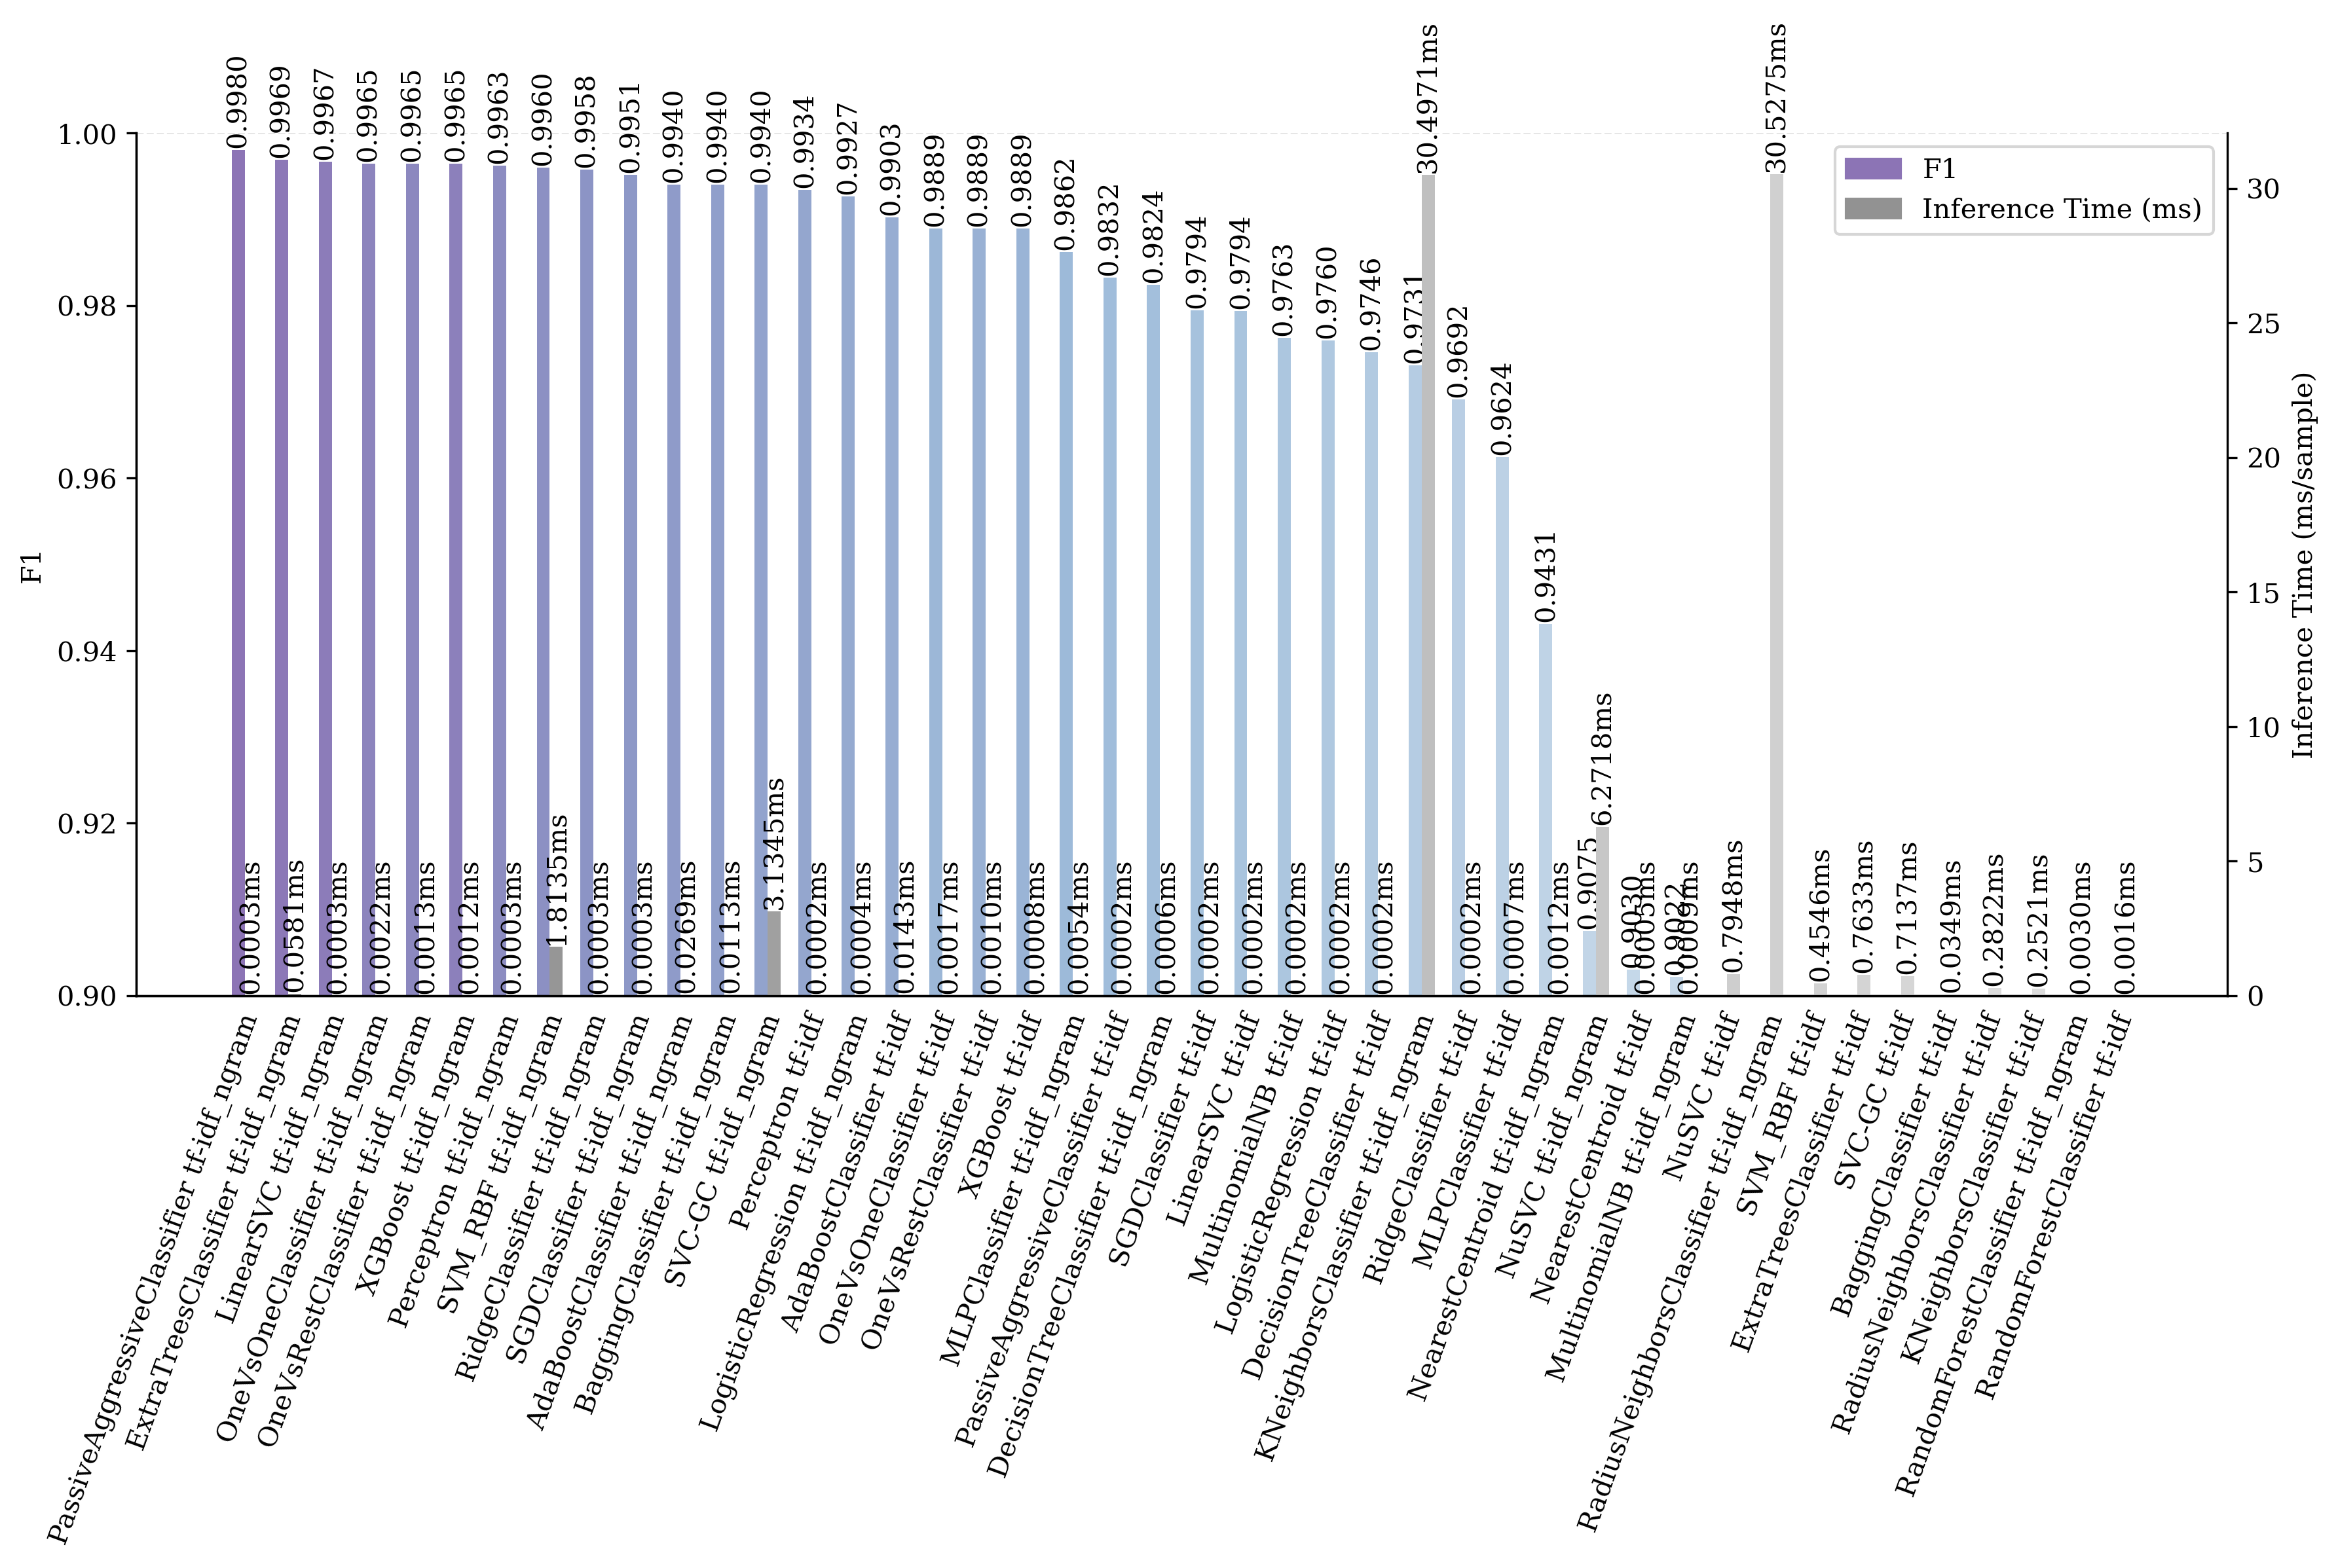

In [26]:
# Figure of Table Single NLP
current_figure_name = 'single_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(12,8))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])


df_small.reset_index(inplace=True)
_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')

ax2.set_ylabel('Inference Time (ms/sample)')
# #ax.set(ylim=(0.95, 1))
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='upper right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### All methods FE score vs alpha

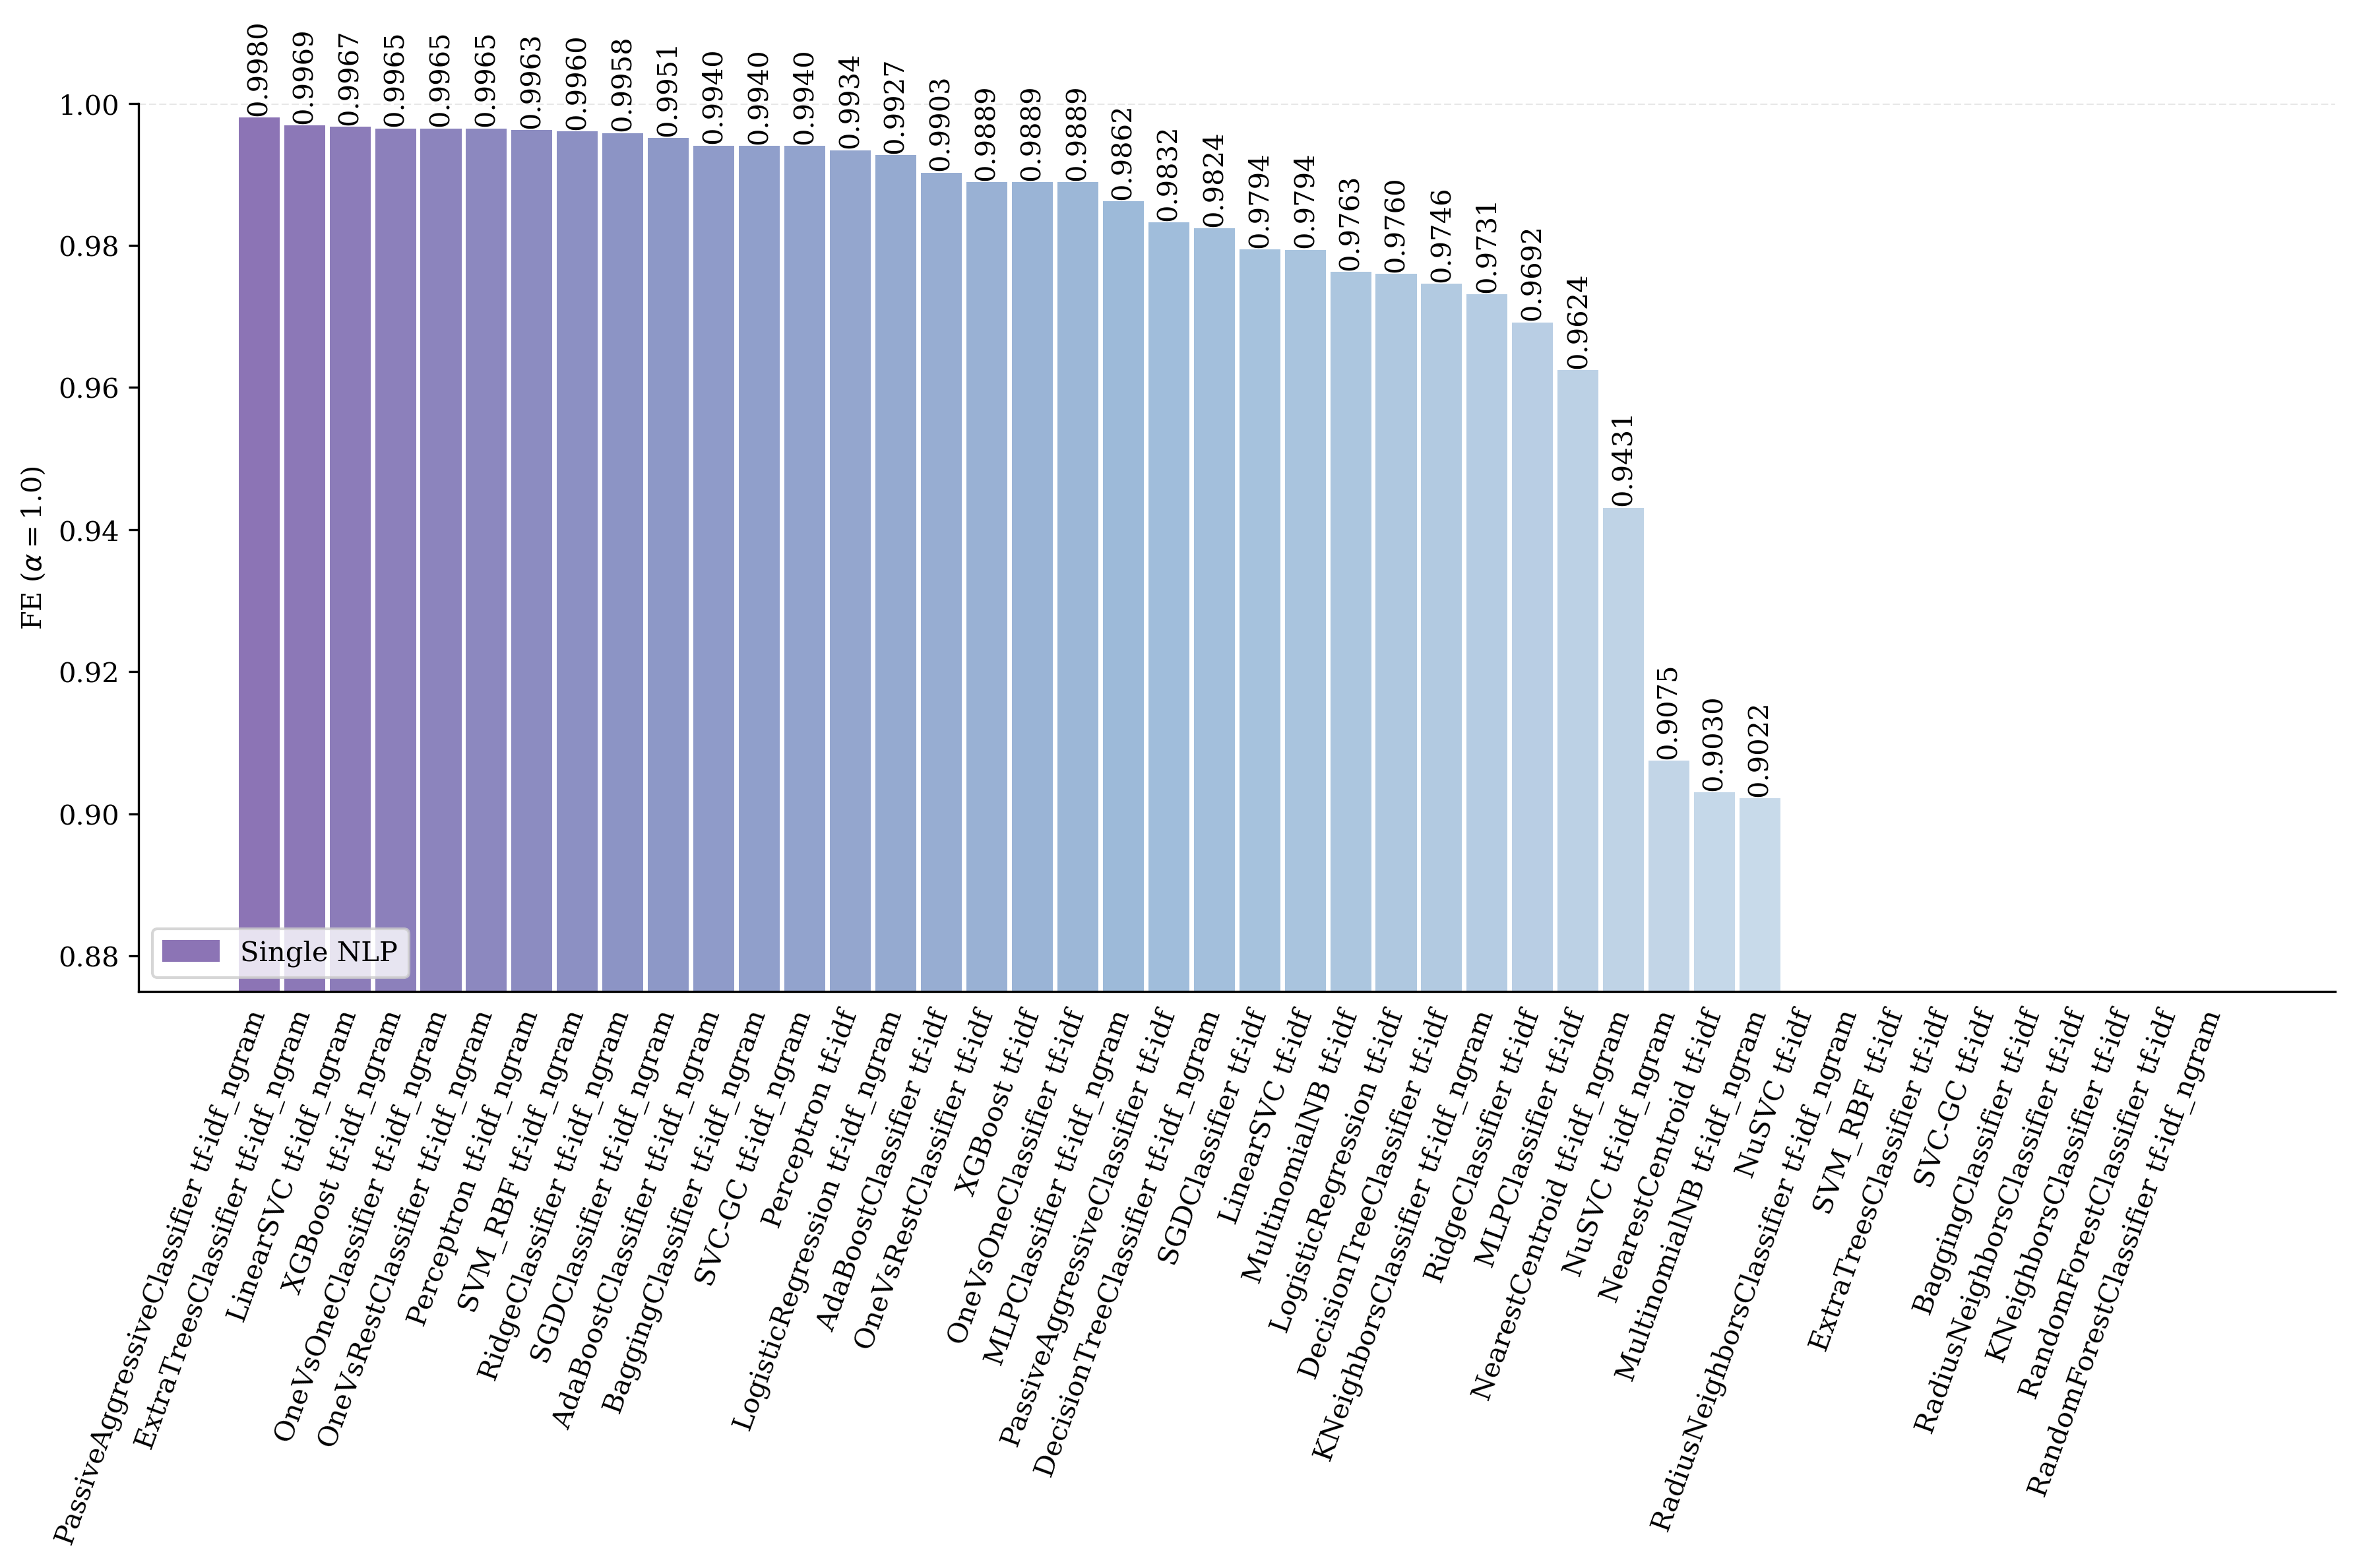

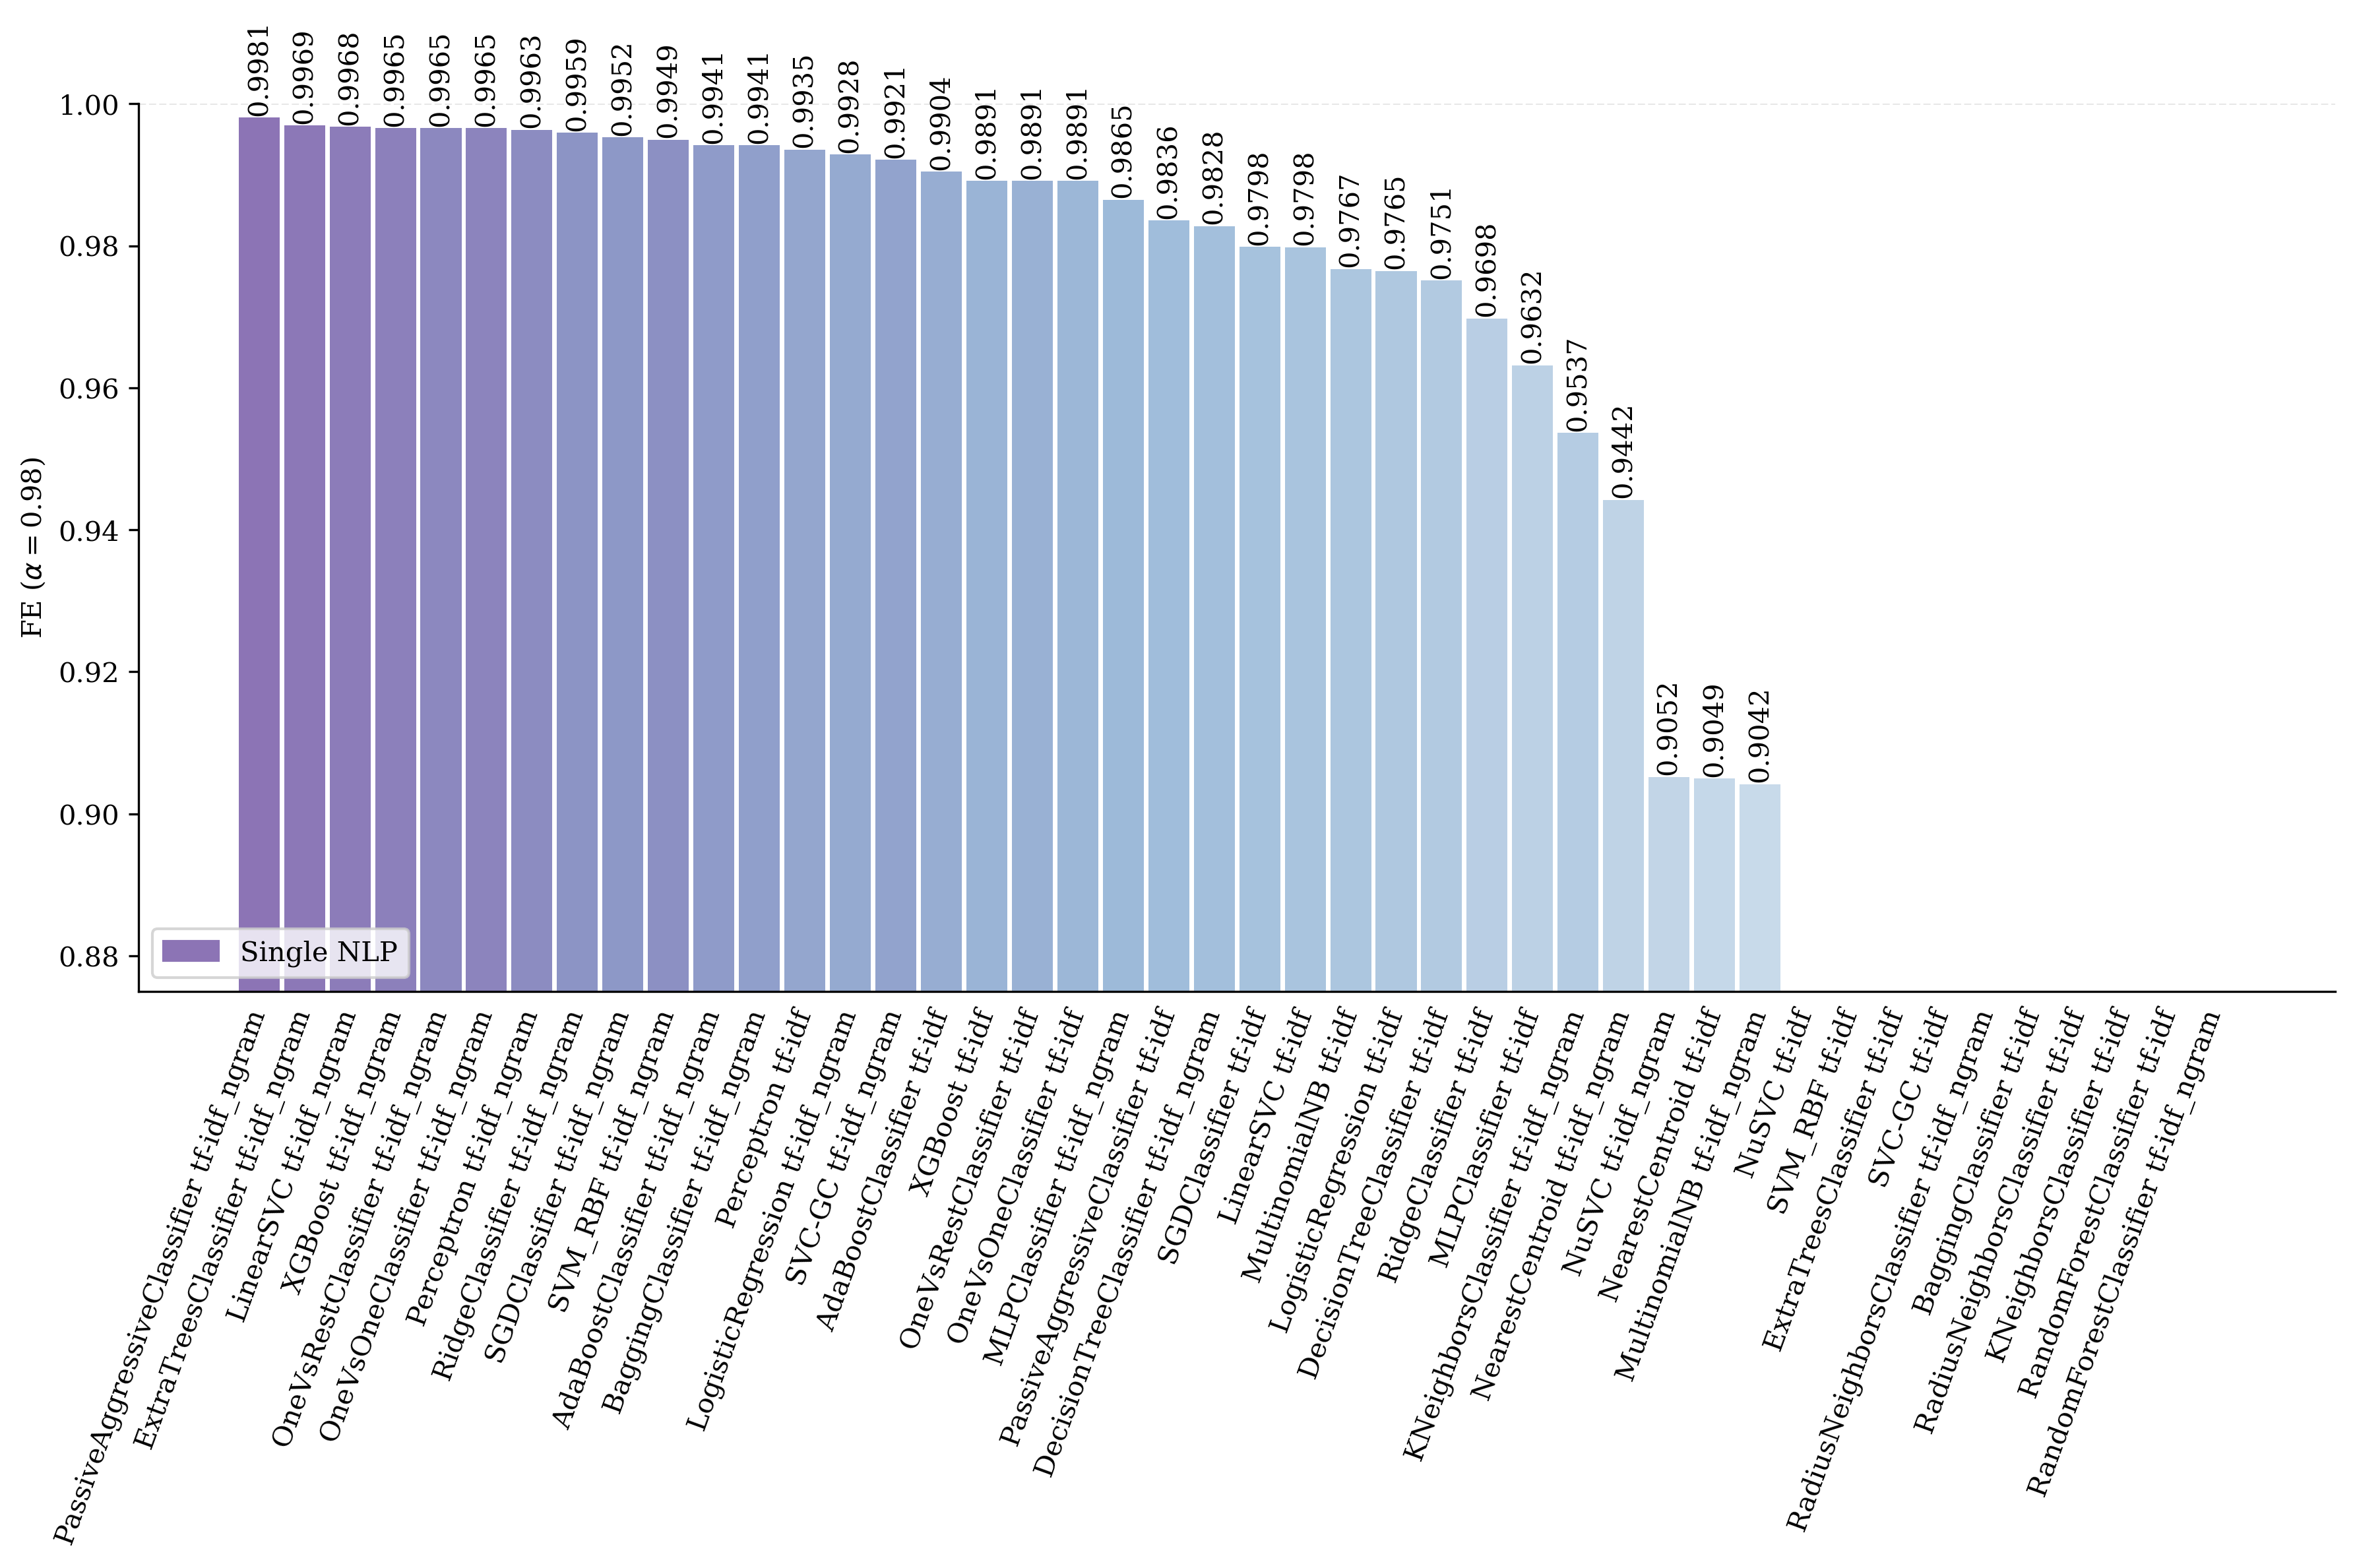

In [27]:
#ALL FE comparison for different alpha
from sklearn import preprocessing

current_figure_name = 'all_nlp_FE_alpha_100.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

alpha = 1.0
#alpha=1.00 #emphasis on F1 rather than speed
df_small['FE_100'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']
#print(df_small)
alpha = 0.98
df_small['FE_098'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']

df_small = rename_table_labels(df_small)



# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
fig, ax = plt.subplots(figsize=(12, 8))
df_small = df_small.sort_values('FE_100',ascending=False)

my_plot_bar(df_small,ax,'FE_100')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)

ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{1.0})')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

#########################
current_figure_name = 'all_nlp_FE_alpha_090.png'
fig, ax = plt.subplots(figsize=(12, 8))
df_small = df_small.sort_values('FE_098',ascending=False)
my_plot_bar(df_small,ax,'FE_098')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{0.98})')
#ax.set_xlabel()
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

### Scatter plot

/tmp/ipykernel_1173891/2775524002.py:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


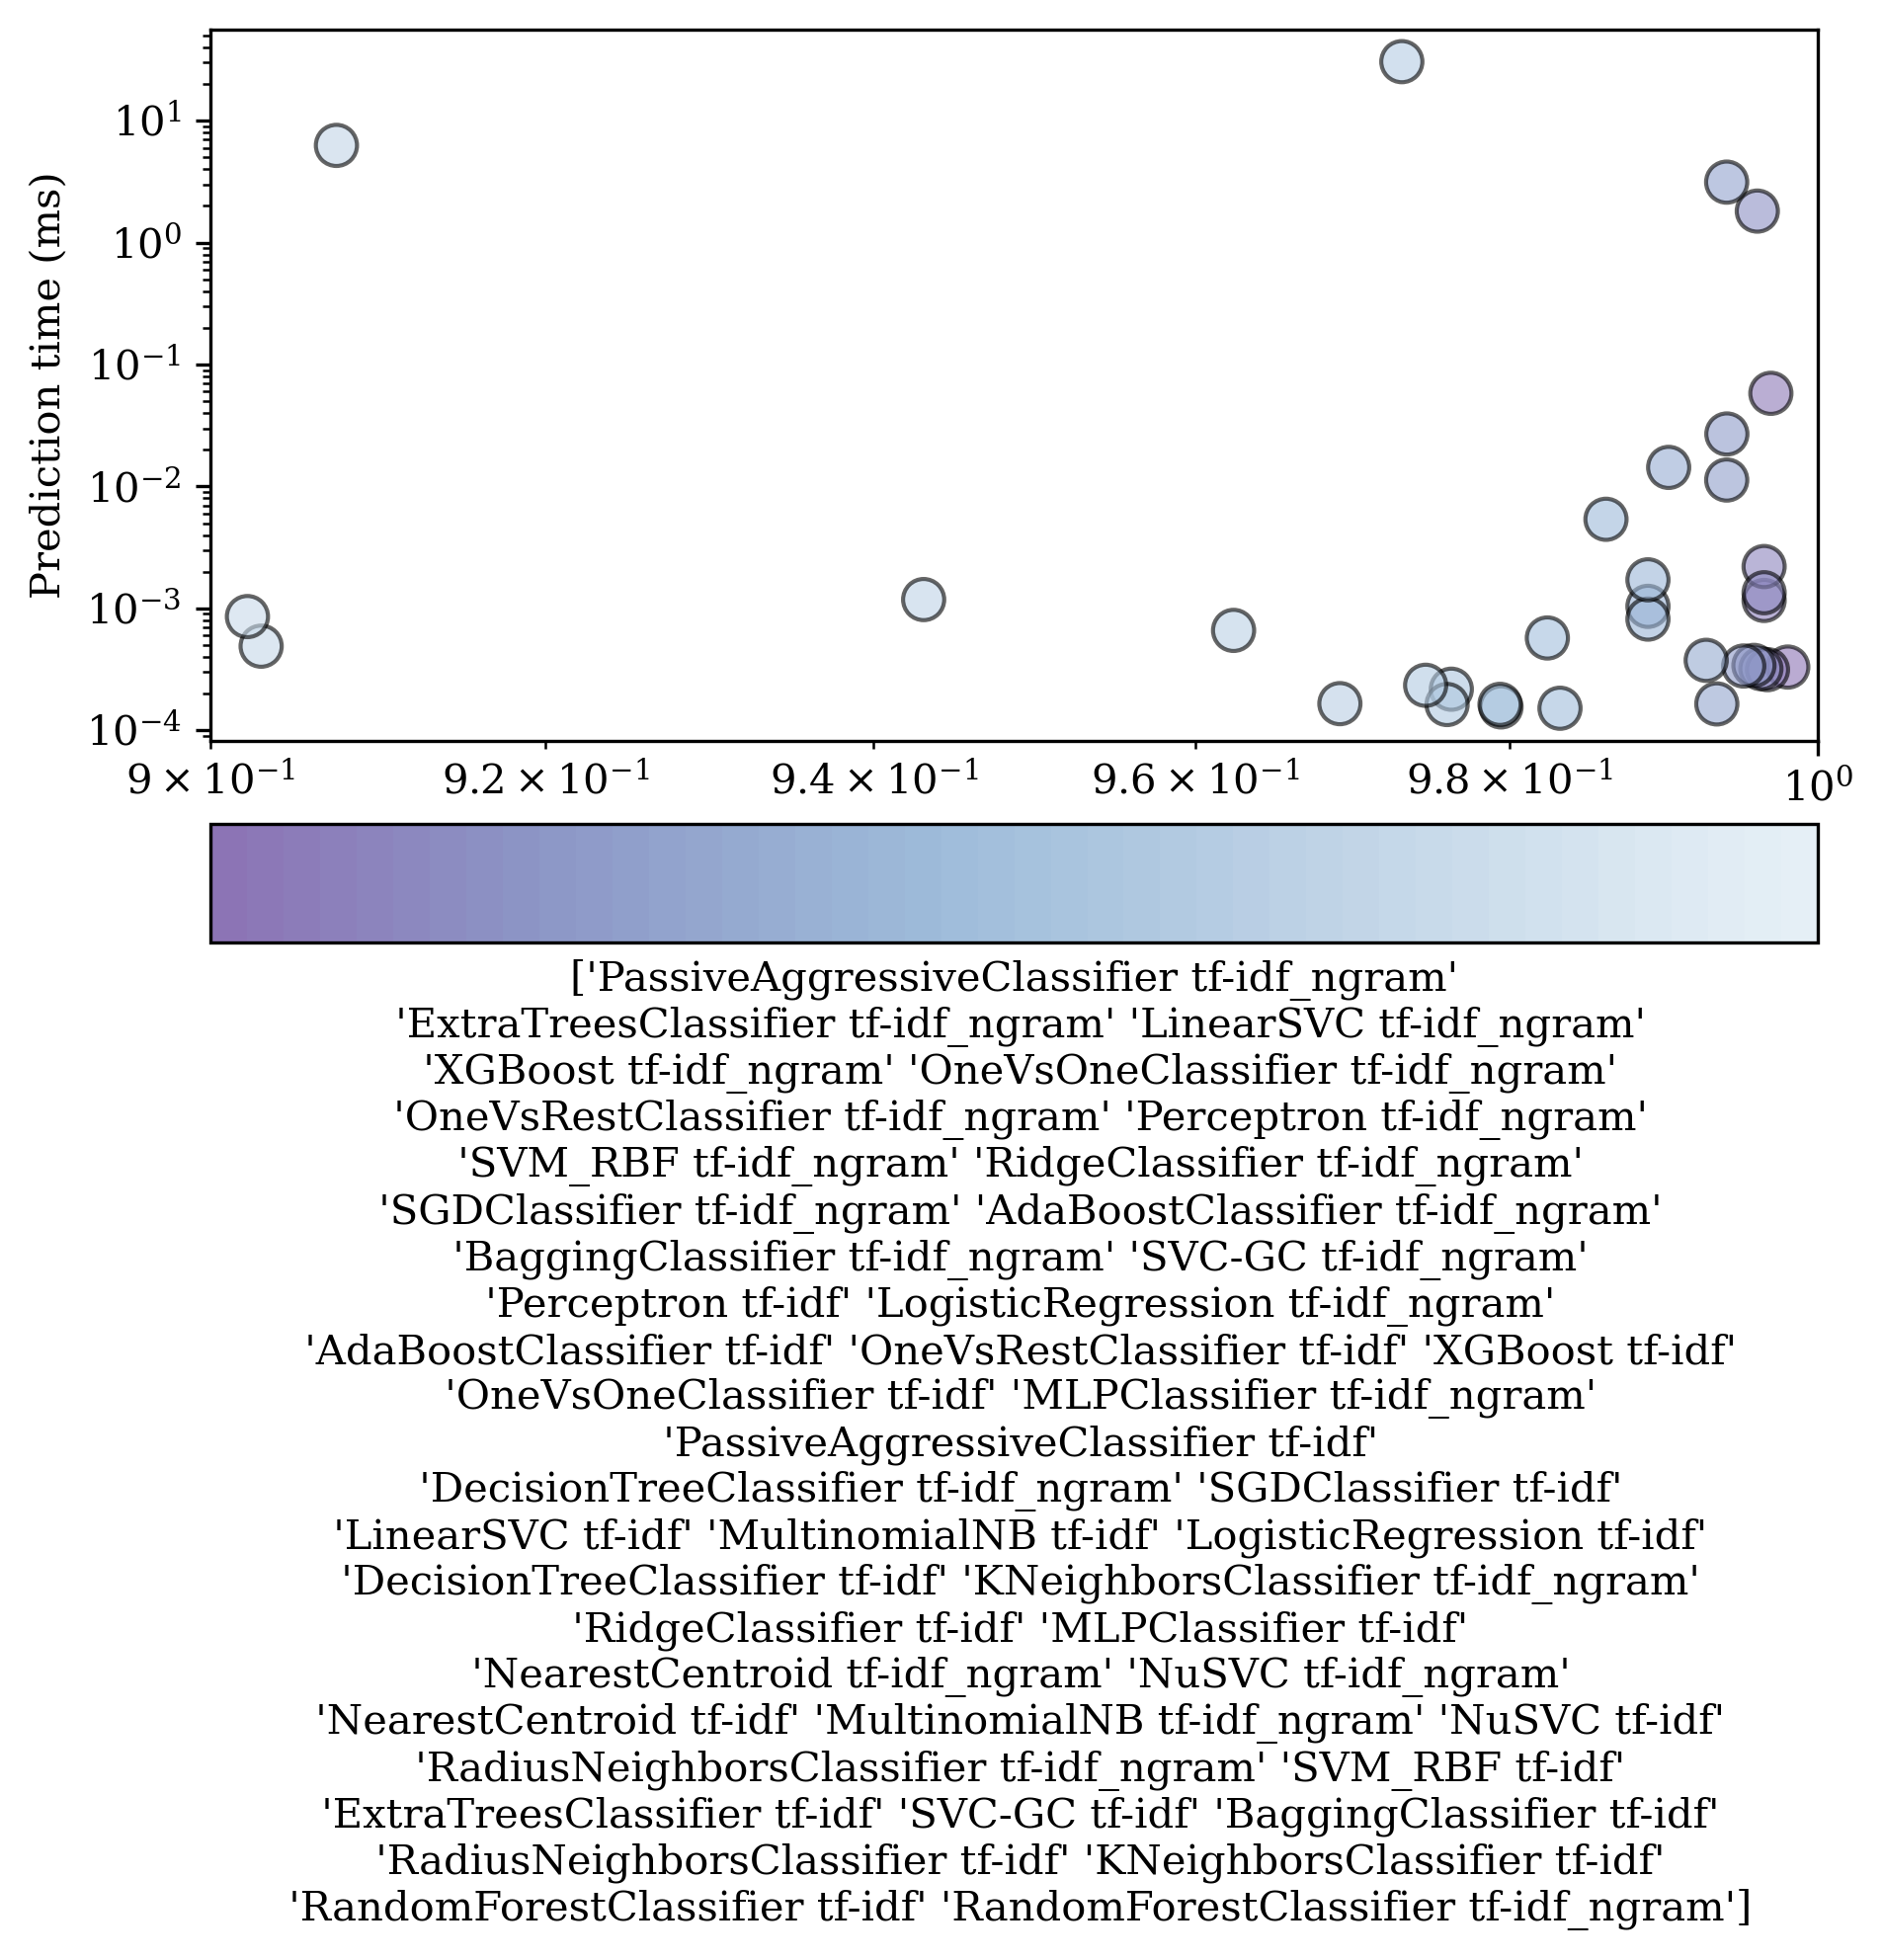

In [28]:
#Scatter plot speed vs F1
from sklearn import preprocessing

current_figure_name = 'speed_vs_f1_scatter.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled
f1 = df_small['f1_score']
t_pred = df_small['pred_time']

colors = df_small.loc[:,'color'].values
colors = [list(colors[i][0]) for i in range(len(colors))]
df_small = rename_table_labels(df_small)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
#fig, ax = plt.subplots(figsize=(7, 4))
fig, (ax, ax2) = plt.subplots(2, figsize=(7, 4), gridspec_kw={'height_ratios': [6, 1]})
#my_plot_bar(df_small,ax,'FE_100')
ax.scatter(f1, t_pred, s=100, alpha=0.6, edgecolor='black', linewidth=1, color=colors)

#ax.set(ylim=(0.0002133462738189675, 0.015607442342392))
ax.set(xlim=(0.9, 1))
ax.set_ylabel('Prediction time (ms)')
ax.set_yscale('log')
ax.set_xlabel('F1')
ax.set_xscale('log')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
#ax.legend(handles=[legend_cat_1],  loc='lower left')
ticks = df_small.Method.values
cmap = (matplotlib.colors.ListedColormap(colors))
cbar = plt.colorbar(
    matplotlib.cm.ScalarMappable(cmap=cmap),
    cax=ax2,
    #extend='both',
    ticks=None,
    #spacing='proportional',
    orientation='horizontal',
    label=str(ticks),
)
cbar.ax.tick_params(size=0)
cbar.set_ticks([])

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)



# TODO
- 

# End